#**Análise histórica do Índice Geral de Preços - Mercado (IGP-M) de 2004 a 2024**

A base de dados foi coletada nos sites: `https://abacusliquid.com/igp-m-historico/` e `https://portal.fgv.br/noticias/igp-m-agosto-2024`.

Disponível em csv no drive: `https://drive.google.com/file/d/1QkI7WXd2QOOPb6qRTr_IG2AqT1jOoeOF/view?usp=sharing`.

Apresentação em slide : https://www.canva.com/design/DAGPPVCQHMY/FLE1HyXTtMFEl9uVBxGAlA/edit?utm_content=DAGPPVCQHMY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

```
obs.: convertida por mim como arquivo csv.
```



## **Procedimentos de tratamento e análise dos dados do IGP-M**

In [ ]:
#Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
 #Dados estão atualizados até agosto de 2024
df_igpm = pd.read_csv('/content/igpm_analise.csv')
df_igpm.tail()

,Mês/Ano,Mês (%),Acumulado no Ano (%),Acumulado nos Últimos 12 Meses (%),Acumulado a partir de Jan/93
243,04-2024,0.31,-0.6111,-3.0409,2689.9298
244,05-2024,0.89,0.2735,-0.3443,2713.8702
245,06-2024,0.81,1.0857,2.4400,2735.8525
246,07-2024,0.61,1.7023,3.8124,2752.5412
247,08-2024,0.29,2.0000,4.2600,2754.8312


In [ ]:
#Visualizar meses de forma cronológica
df = df_igpm.copy()
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], format='%m-%Y')

In [ ]:
#Conhecendo dados do csv para tratar caso necessário
num_linhas = df_igpm.shape[0]
num_colunas = df_igpm.shape[1]
colunas = df_igpm.columns.values

print(f"Número de linhas: {num_linhas} \n"
      f"Número de colunas: {num_colunas} \n"
      f"Colunas: {colunas} \n")

Número de linhas: 248 
Número de colunas: 5 
Colunas: ['Mês/Ano' 'Mês (%)' 'Acumulado no Ano (%)'
 'Acumulado nos Últimos 12 Meses (%)' 'Acumulado a partir de Jan/93'] 



In [ ]:
# Conferindo dados das colunas do dataframe
df_igpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Mês/Ano                             248 non-null    object 
 1   Mês (%)                             248 non-null    float64
 2   Acumulado no Ano (%)                248 non-null    float64
 3   Acumulado nos Últimos 12 Meses (%)  248 non-null    float64
 4   Acumulado a partir de Jan/93        248 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.8+ KB


In [ ]:
#Descrição estatística - medidas descritivas
df_igpm.describe()

,Mês (%),Acumulado no Ano (%),Acumulado nos Últimos 12 Meses (%),Acumulado a partir de Jan/93
count,248.000000,248.000000,248.000000,248.000000
mean,0.553347,3.795092,7.026238,1497.010310
std,0.836684,4.624039,6.996782,649.992298
min,-1.930000,-5.279100,-7.714000,714.747900
25%,0.077500,0.785325,3.434650,978.269800
50%,0.500000,2.760150,6.513650,1318.831150
75%,0.890000,6.075425,9.802625,1772.633625
max,4.340000,23.139100,37.063000,2873.086500


In [ ]:
# Média de cada coluna, interessante analisar a média do acumulado no ano e no acumulado nos últimos 12 meses.
df[colunas].mean()

,0
Mês/Ano,2014-04-16 17:01:56.129032192
Mês (%),0.553347
Acumulado no Ano (%),3.795092
Acumulado nos Últimos 12 Meses (%),7.026238
Acumulado a partir de Jan/93,1497.01031


In [ ]:
#Enfoque nas colunas dos percentuais do IGP-M acumulado no ano e no acumulado nos últimos 12 meses.
acumulado_ano = df['Acumulado no Ano (%)']
acumulado_12meses = df['Acumulado nos Últimos 12 Meses (%)']
acumulado_ano

,Acumulado no Ano (%)
0,0.8800
1,1.5761
2,2.7239
3,3.9668
4,5.3288
...,...
243,-0.6111
244,0.2735
245,1.0857
246,1.7023


### **IGP-M acumulado no ano:** índice que considera a variação dos preços desde o início do ano até o mês atual.

In [ ]:
import numpy as np

# Calcular a média, desvio padrão, valor mínimo, primeiro e terceiro quartis e valor máximo dos percentuais do IGP-M acumulado no ano
print("Média:",np.mean(acumulado_ano))
print("Desvio Padrão:",np.std(acumulado_ano))
print("Valor mínimo:",np.min(acumulado_ano))
print("Primeiro Quartil:",np.quantile(acumulado_ano,0.25))
print("Mediana (Q2):",np.median(acumulado_ano))
print("Terceiro Quartil:",np.quantile(acumulado_ano,0.75))
print("Valor máximo:",np.max(acumulado_ano))

Média: 3.795092338709678
Desvio Padrão: 4.61470691560332
Valor mínimo: -5.2791
Primeiro Quartil: 0.785325
Mediana (Q2): 2.7601500000000003
Terceiro Quartil: 6.075425
Valor máximo: 23.1391


<function matplotlib.pyplot.show(close=None, block=None)>

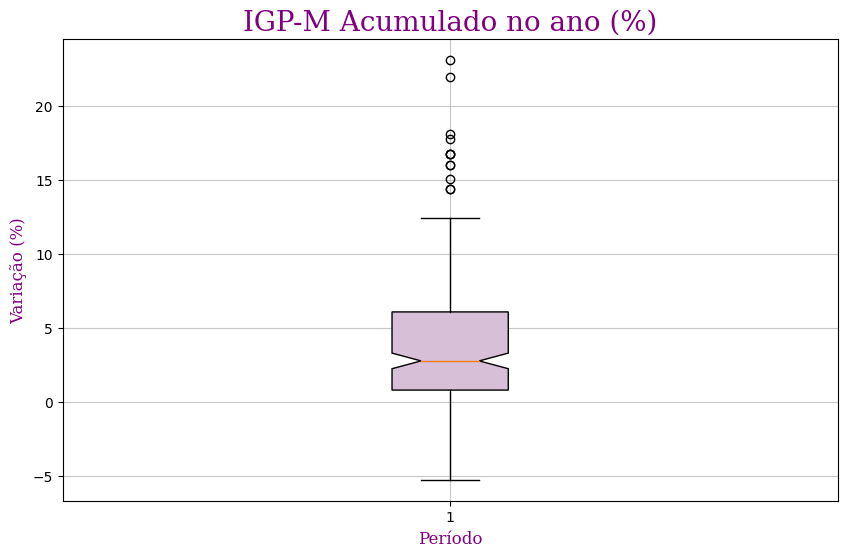

In [ ]:
plt.figure(figsize=(10, 6))
boxplot_ano = plt.boxplot(acumulado_ano, patch_artist=True, notch=True, vert=True)
for patch in boxplot_ano['boxes']:
    patch.set_facecolor('#D8BFD8')

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('IGP-M Acumulado no ano (%)', fontdict=font1)
plt.xlabel('Período', fontdict=font2)
plt.ylabel('Variação (%)', fontdict=font2)
plt.grid(True, linestyle='-', alpha=0.7)
plt.show


###**IGP-M dos últimos 12 meses:** índice que considera a variação dos preços nos últimos 12 meses completos.

In [ ]:
# Calcular a média, desvio padrão, valor mínimo, primeiro e terceiro quartis e valor máximo dos percentuais do IGM_M acumulado nos últimos 12 meses
print("Média:",np.mean(acumulado_12meses))
print("Desvio Padrão:",np.std(acumulado_12meses))
print("Valor mínimo:",np.min(acumulado_12meses))
print("Primeiro Quartil:",np.quantile(acumulado_12meses,0.25))
print("Mediana (Q2):",np.median(acumulado_12meses))
print("Terceiro Quartil:",np.quantile(acumulado_12meses,0.75))
print("Valor máximo:",np.max(acumulado_12meses))

Média: 7.026237500000001
Desvio Padrão: 6.982661611096852
Valor mínimo: -7.714
Primeiro Quartil: 3.4346500000000004
Mediana (Q2): 6.51365
Terceiro Quartil: 9.802625
Valor máximo: 37.063


<function matplotlib.pyplot.show(close=None, block=None)>

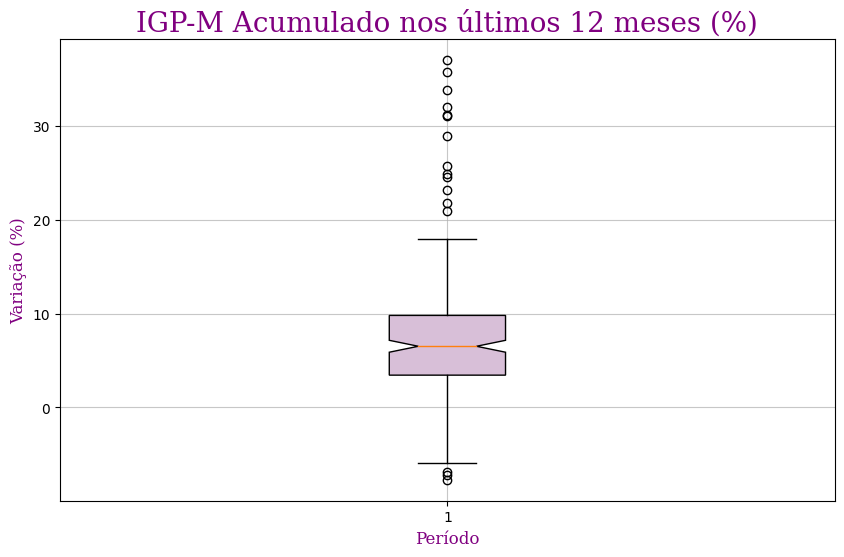

In [ ]:
plt.figure(figsize=(10, 6))
boxplot_ano = plt.boxplot(acumulado_12meses, patch_artist=True, notch=True, vert=True)
for patch in boxplot_ano['boxes']:
    patch.set_facecolor('#D8BFD8')

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('IGP-M Acumulado nos últimos 12 meses (%)', fontdict=font1)
plt.xlabel('Período', fontdict=font2)
plt.ylabel('Variação (%)', fontdict=font2)
plt.grid(True, linestyle='-', alpha=0.7)
plt.show

As diferenças entre os dois boxplots indicam que o **IGP-M acumulado dos últimos 12 meses** é sempre um período superior ou igual ao **acumulado no ano**, a média do IGP-M dos últimos 12 meses é significativamente maior. Isto ocorre porque a variação dos preços é maior ao considerar um período mais longo.

Logo, é importante ressaltar que o **O IGP-M dos últimos 12 meses** oferece uma visão mais ampla e histórica das variações de preços, identificando tendências de longo prazo e suavizando flutuações sazonais.

## **Plotar gráficos que estão presentes na apresentação dos *slides***

## Importância do IGP-M no Contexto Econômico

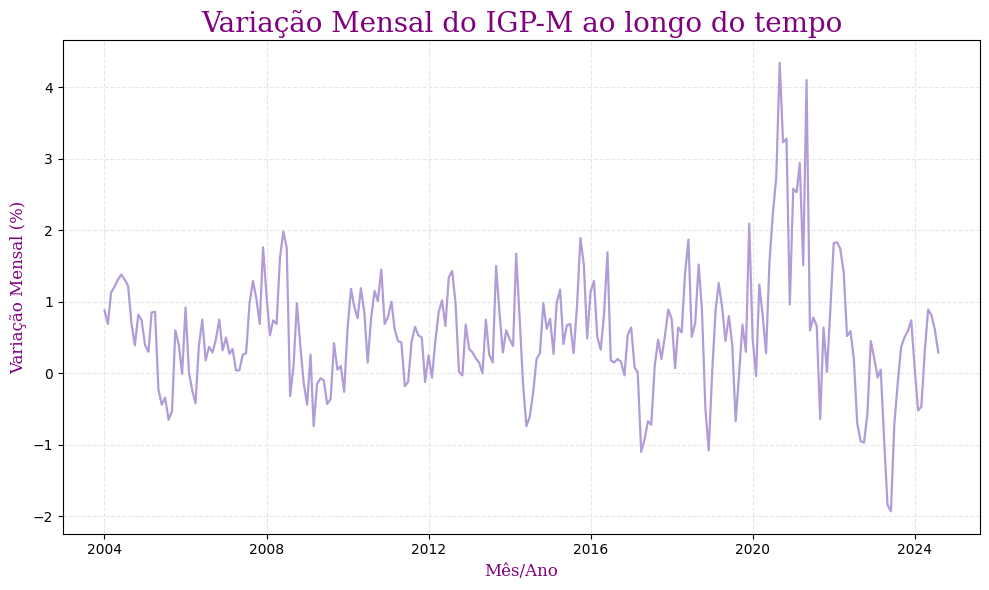

In [ ]:
# Importância do IGP-M no contexto econômico

#Variação mensal do IGP-M para ilustrar como os reajustes podem ocorrer com o tempo
plt.figure(figsize=(10, 6))
plt.plot(df['Mês/Ano'], df['Mês (%)'], linestyle='-', color='#b19cd9', linewidth=1.6)

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('Variação Mensal do IGP-M ao longo do tempo', fontdict=font1)
plt.xlabel('Mês/Ano', fontdict = font2)
plt.ylabel('Variação Mensal (%)', fontdict = font2)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

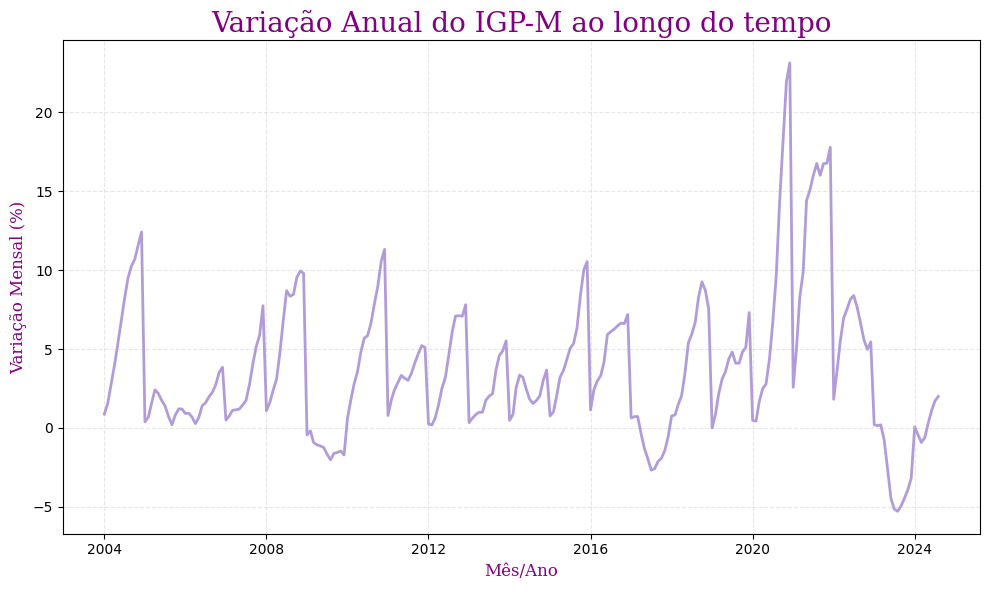

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Mês/Ano'], df['Acumulado no Ano (%)'], linestyle='-', color='#b19cd9', linewidth=2)

font1 = {'family':'serif','color':'purple','size':20}
font2 = {'family':'serif','color':'purple','size':12}
plt.title('Variação Anual do IGP-M ao longo do tempo', fontdict=font1)
plt.xlabel('Mês/Ano', fontdict = font2)
plt.ylabel('Variação Mensal (%)', fontdict = font2)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

## Evolução do IGP-M (2004-2010)

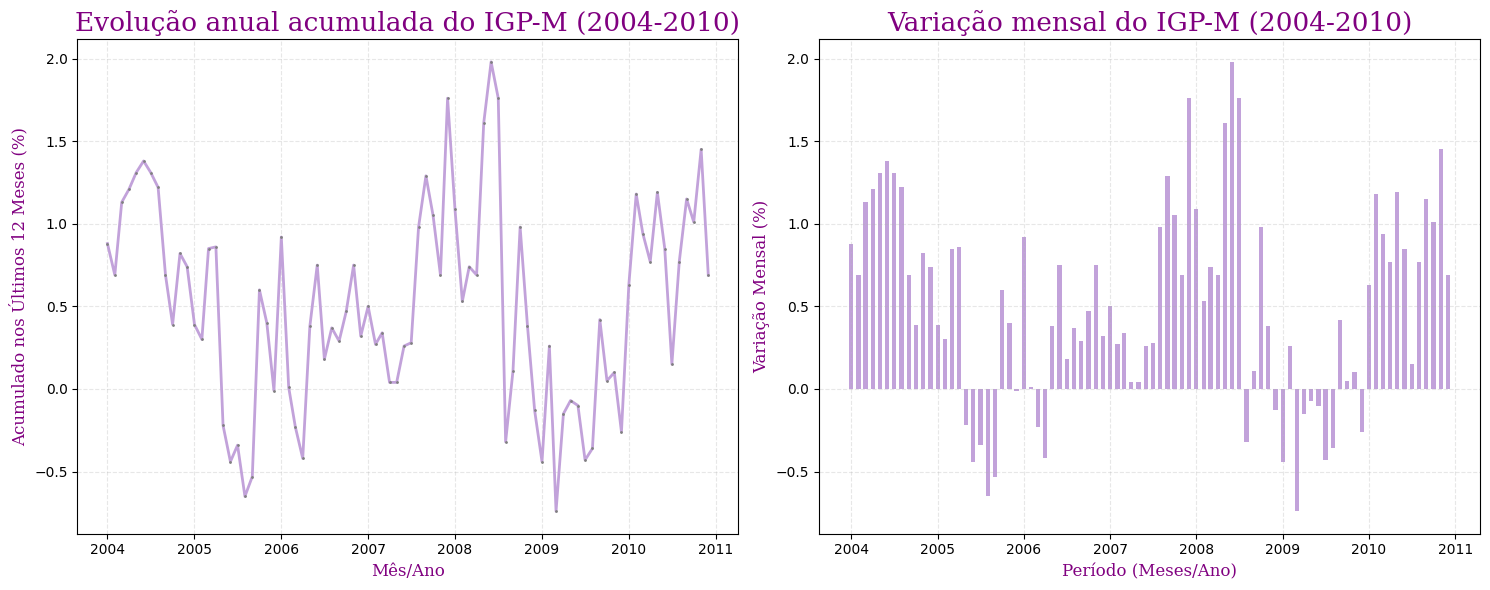

In [ ]:
#Evolução do IGP-M (2004-2010)
inicio_2004 = '01-2004'
fim_2010 = '12-2010'
evolucao_igpm1 = df[(df['Mês/Ano'] >= inicio_2004) & (df['Mês/Ano'] <= fim_2010)]

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

#figura com dois eixos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Gráfico da evolução acumulada anual
axs[0].plot(evolucao_igpm1['Mês/Ano'], evolucao_igpm1['Mês (%)'], linestyle='-', color = '#c2a2da', linewidth=2, marker = 'o', ms = 1,  mec='Gray')
axs[0].set_title('Evolução anual acumulada do IGP-M (2004-2010)', fontdict = font1)
axs[0].set_xlabel('Mês/Ano', fontdict = font2)
axs[0].set_ylabel('Acumulado nos Últimos 12 Meses (%)', fontdict = font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gráfico da variação mensal
axs[1].bar(evolucao_igpm1['Mês/Ano'], evolucao_igpm1['Mês (%)'], color='#c2a2da', width=18)
axs[1].set_title('Variação mensal do IGP-M (2004-2010)', fontdict = font1)
axs[1].set_xlabel('Período (Meses/Ano)', fontdict = font2)
axs[1].set_ylabel('Variação Mensal (%)', fontdict = font2)

axs[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()


## Evolução do IGP-M (2011-2017)

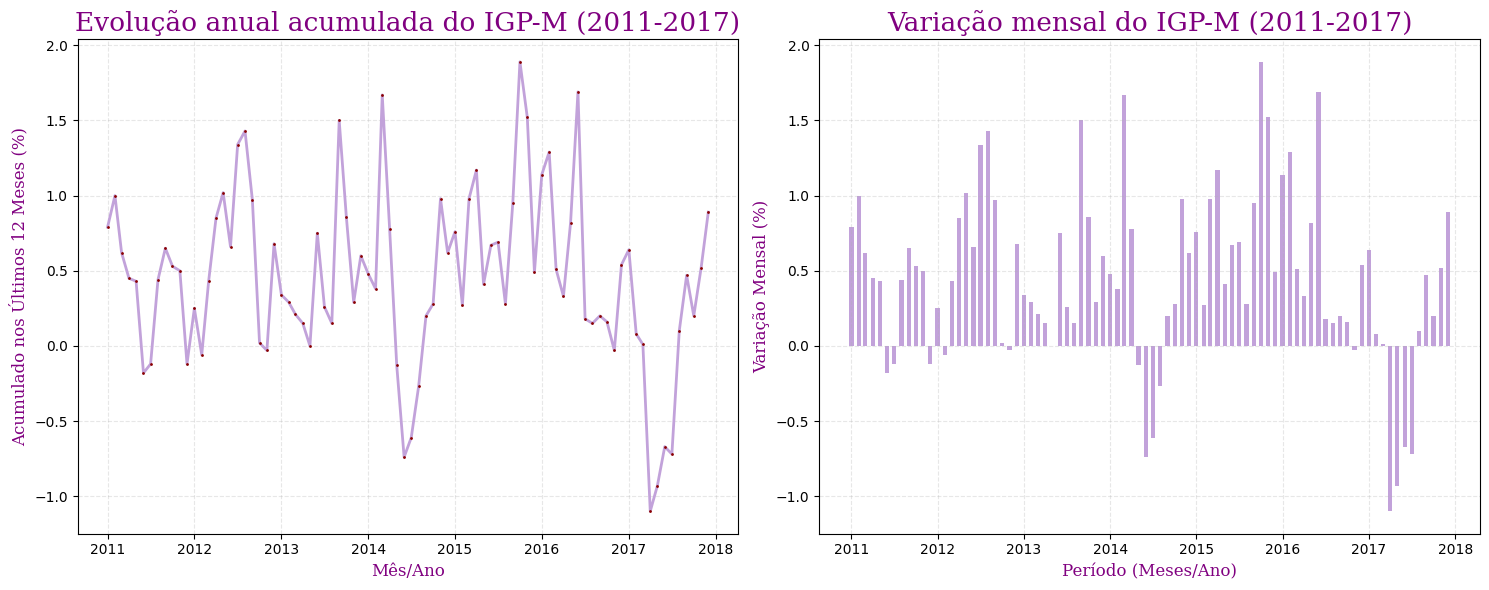

In [ ]:
#Evolução do IGP-M (2011-2017)
inicio_2011 = '01-2011'
fim_2017 = '12-2017'
evolucao_igpm2 = df[(df['Mês/Ano'] >= inicio_2011) & (df['Mês/Ano'] <= fim_2017)]

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

#figura com dois eixos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Gráfico da evolução acumulada anual
axs[0].plot(evolucao_igpm2['Mês/Ano'], evolucao_igpm2['Mês (%)'], linestyle='-', color = '#c2a2da', linewidth=2, marker = 'o', ms = 1,  mec='#8b0000')
axs[0].set_title('Evolução anual acumulada do IGP-M (2011-2017)', fontdict = font1)
axs[0].set_xlabel('Mês/Ano', fontdict = font2)
axs[0].set_ylabel('Acumulado nos Últimos 12 Meses (%)', fontdict = font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gráfico da variação mensal
axs[1].bar(evolucao_igpm2['Mês/Ano'], evolucao_igpm2['Mês (%)'], color='#c2a2da', width=18)
axs[1].set_title('Variação mensal do IGP-M (2011-2017)', fontdict = font1)
axs[1].set_xlabel('Período (Meses/Ano)', fontdict = font2)
axs[1].set_ylabel('Variação Mensal (%)', fontdict = font2)

axs[1].grid(True, linestyle='--', alpha=0.3)


plt.tight_layout()

plt.show()

## Evolução do IGP-M (2018-2024)



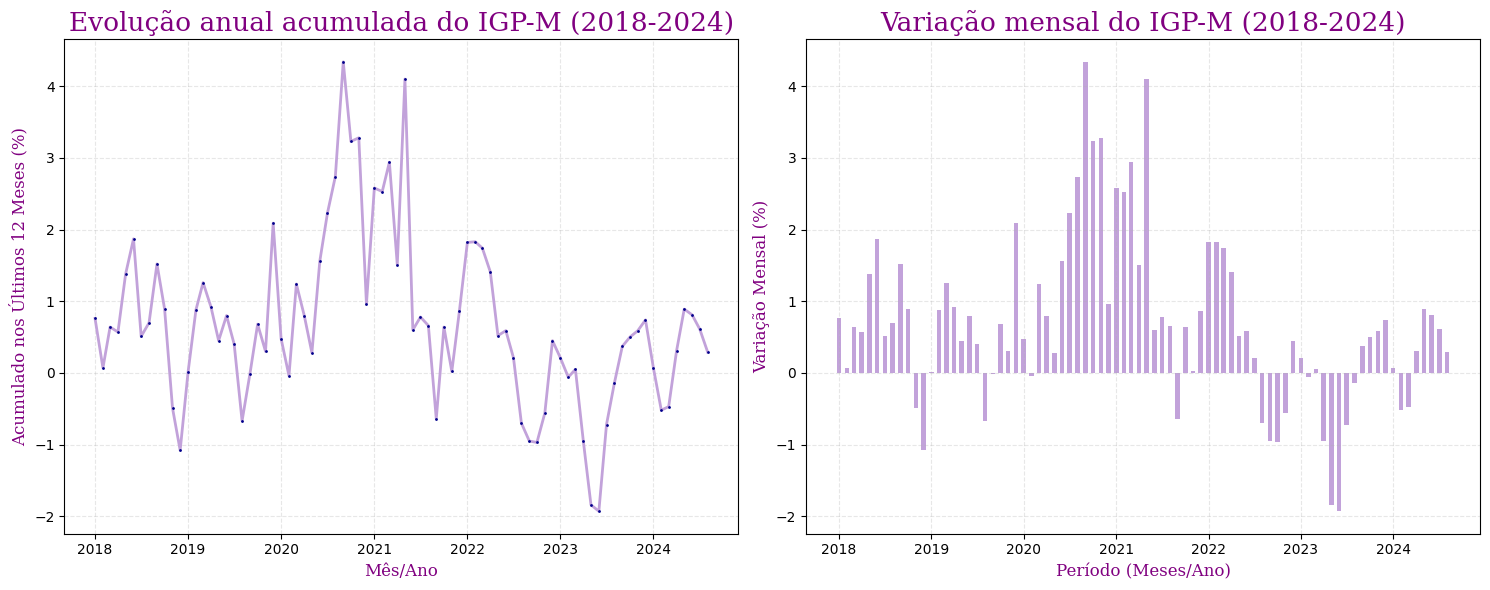

In [ ]:
#Evolução do IGP-M (2011-2017)
inicio_2018 = '01-2018'
fim_2024 = '08-2024'
evolucao_igpm3 = df[(df['Mês/Ano'] >= inicio_2018) & (df['Mês/Ano'] <= fim_2024)]

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

#figura com dois eixos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Gráfico da evolução acumulada anual
axs[0].plot(evolucao_igpm3['Mês/Ano'], evolucao_igpm3['Mês (%)'], linestyle='-', color = '#c2a2da', linewidth=2, marker = 'o', ms = 1,  mec='#00008b')
axs[0].set_title('Evolução anual acumulada do IGP-M (2018-2024)', fontdict = font1)
axs[0].set_xlabel('Mês/Ano', fontdict = font2)
axs[0].set_ylabel('Acumulado nos Últimos 12 Meses (%)', fontdict = font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gráfico da variação mensal
axs[1].bar(evolucao_igpm3['Mês/Ano'], evolucao_igpm3['Mês (%)'], color='#c2a2da', width=18)
axs[1].set_title('Variação mensal do IGP-M (2018-2024)', fontdict = font1)
axs[1].set_xlabel('Período (Meses/Ano)', fontdict = font2)
axs[1].set_ylabel('Variação Mensal (%)', fontdict = font2)

axs[1].grid(True, linestyle='--', alpha=0.3)


plt.tight_layout()

plt.show()

## Diferença entre o IGP-M acumulado no ano e o dos últimos 12 meses

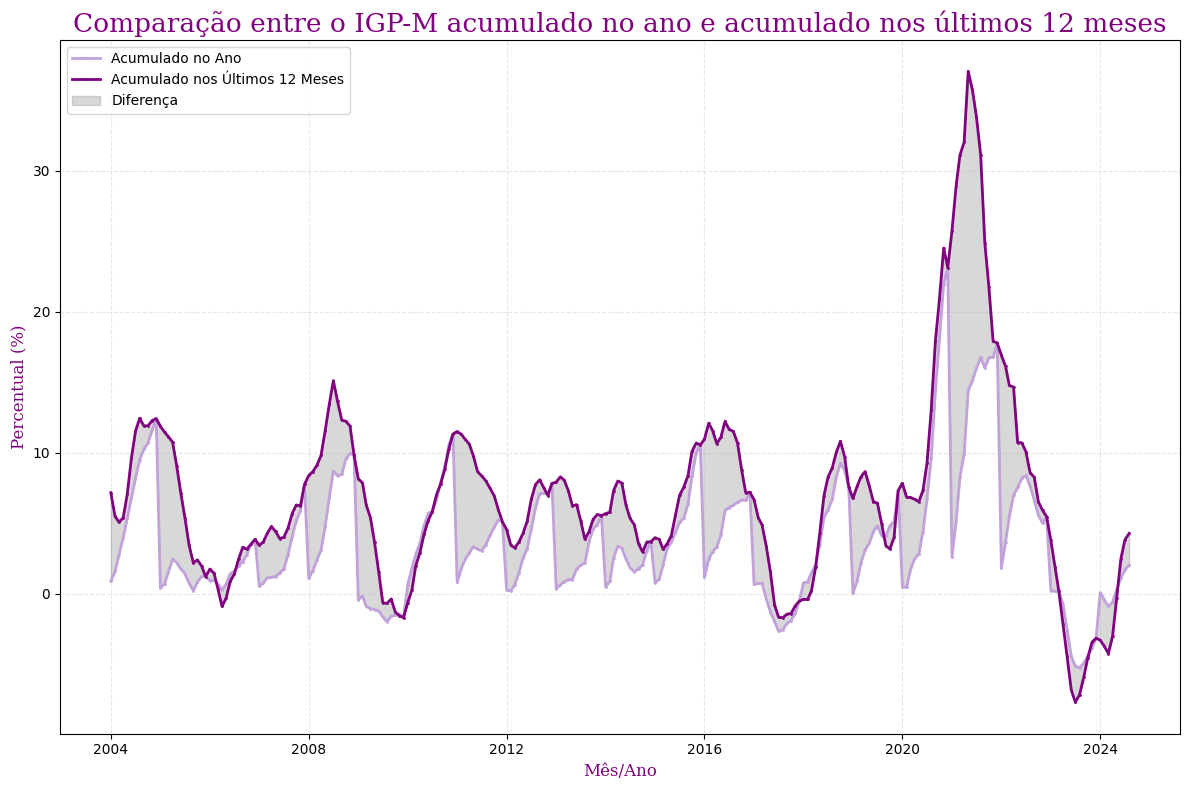

In [ ]:
df = df.sort_values(by='Mês/Ano').reset_index(drop=True)

plt.figure(figsize=(12, 8))

# IGP-M Acumulado no Ano
plt.plot(df['Mês/Ano'], df['Acumulado no Ano (%)'], linestyle='-', color = '#c2a2da', marker = 'o', ms = 1, label='Acumulado no Ano', linewidth=2)

# IGP-M Acumulado nos Últimos 12 Meses
plt.plot(df['Mês/Ano'], df['Acumulado nos Últimos 12 Meses (%)'], linestyle='-', color='purple', marker = 'o', ms = 1, label='Acumulado nos Últimos 12 Meses', linewidth=2)

plt.fill_between(df['Mês/Ano'], df['Acumulado no Ano (%)'], df['Acumulado nos Últimos 12 Meses (%)'], color='gray', alpha=0.3, label='Diferença')

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

plt.title('Comparação entre o IGP-M acumulado no ano e acumulado nos últimos 12 meses', fontdict=font1)
plt.xlabel('Mês/Ano', fontdict=font2)
plt.ylabel('Percentual (%)', fontdict=font2)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Análise de Longo Prazo (2004-2024)

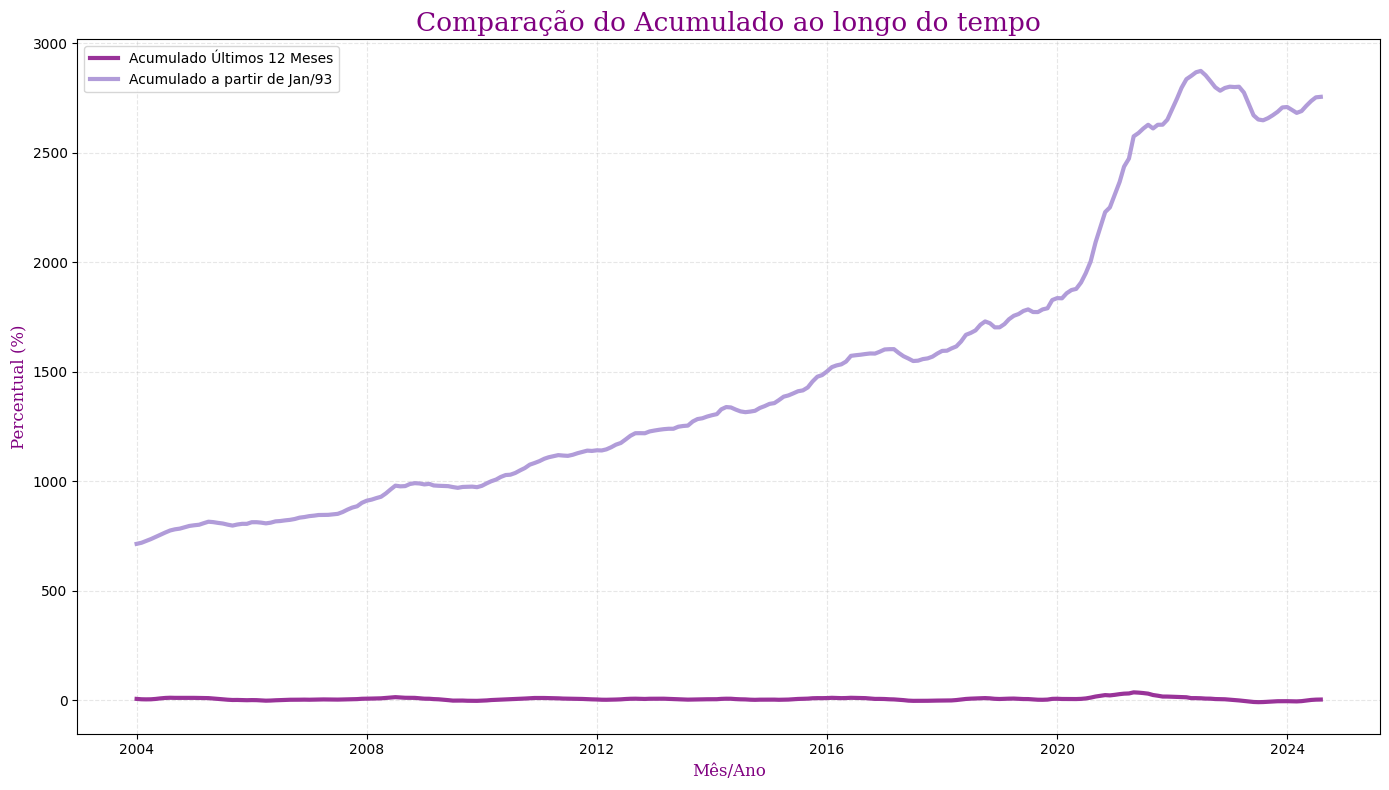

In [ ]:
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], format='%B/%Y', errors='coerce')
df = df.sort_values(by='Mês/Ano').reset_index(drop=True)

#plotando o acumulado nos últimos 12 meses e o acumulado a partir de janeiro de 1993
plt.figure(figsize=(14, 8))
plt.plot(df['Mês/Ano'], df['Acumulado nos Últimos 12 Meses (%)'], linestyle='-', color='#993399', linewidth = 3, label='Acumulado Últimos 12 Meses')
plt.plot(df['Mês/Ano'], df['Acumulado a partir de Jan/93'], linestyle='-', color='#b19cd9', linewidth = 3, label='Acumulado a partir de Jan/93')

#fonts
font1 = {'family':'serif','color':'purple','size':19}
font2 = {'family':'serif','color':'purple','size':12}

plt.title('Comparação do Acumulado ao longo do tempo', fontdict=font1)
plt.xlabel('Mês/Ano', fontdict=font2)
plt.ylabel('Percentual (%)',fontdict=font2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()

plt.show()


# 🧮🏠 **Exemplo prático:** Calculadora de reajuste de aluguel com base no IGP-M de agosto de 2024

### O objetivo é demonstrar como o valor do aluguel pode ser ajustado com base no Índice Geral de Preços do Mercado (IGP-M). O cálculo é realizado utilizando o valor acumulado do IGP-M nos últimos 12 meses até agosto de 2024.

In [31]:
valor_atual_aluguel = float(input("💸➡️ Digite o valor atual do aluguel em reais: "))
print(f"✅🏡 Confirmando o valor atual do aluguel: R$ {valor_atual_aluguel:.2f}")

# determinando o IGP-M acumulado nos últimos 12 meses considerando agosto de 2024
igpm_acumulado_12_meses = df['Acumulado nos Últimos 12 Meses (%)'].iloc[-1] #último mês do dataframe

# porcentagem para decimal
igpm_acumulado_decimal = igpm_acumulado_12_meses / 100

# novo valor do aluguel
novo_valor_aluguel = valor_atual_aluguel * (1 + igpm_acumulado_decimal)

print(f"📈 IGP-M acumulado nos últimos 12 meses: {igpm_acumulado_12_meses:.2f}%")
print(f"💰 Com o reajuste você pagará um aluguel de R$ {novo_valor_aluguel:.2f}")



💸➡️ Digite o valor atual do aluguel em reais: 1500
✅🏡 Confirmando o valor atual do aluguel: R$ 1500.00
📈 IGP-M acumulado nos últimos 12 meses: 4.26%
💰 Com o reajuste você pagará um aluguel de R$ 1563.90
